In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# aggregate sum, mean, median, min, max for each year
rainfall_se = pd.read_pickle('./data/rainfall_se.pkl')
# data of monthly rainfall from 1836 to 2025 in long format
rainfall_data_se = pd.read_pickle('./data/rainfall_data_se.pkl')

FileNotFoundError: [Errno 2] No such file or directory: './data/rainfall_se.pkl'

# Data Visualization

This notebook outlines the construction of data plotting functions.

The first visualization we'll consider is a bar plot showing annual precipitation—either total, mean, or median values for each year. Since we'll be analyzing different time spans, it's useful to develop plotting functions that accept a start and end year as parameters.

As a starting point, we can explore a personal observation: since moving to the UK, it seems that recent years have been drier compared to earlier ones. To investigate this, we can plot total rainfall in the South East/Central region from 2010 to 2023 and compare it with data from 2024 onward.

Additionally, we can consider external events such as the hosepipe ban introduced by Thames Water in 2022 due to water scarcity—likely caused by a prolonged drought in the region, particularly affecting London and possibly the broader South East.


In [2]:
rainfall_se.head()

,year,total_rainfall,avg_rainfall,std_rainfall,median_rainfall,max_rainfall,min_rainfall
0,1836,892.4,74.4,29.4,66.4,126.1,21.5
1,1837,622.3,51.9,22.7,48.0,87.5,19.8
2,1838,679.9,56.7,32.3,51.0,122.8,12.9
3,1839,876.0,73.0,35.4,59.5,137.5,25.2
4,1840,601.9,50.2,34.7,49.6,121.6,5.0


Total Rainfall mean (2010-2023) = 829.99


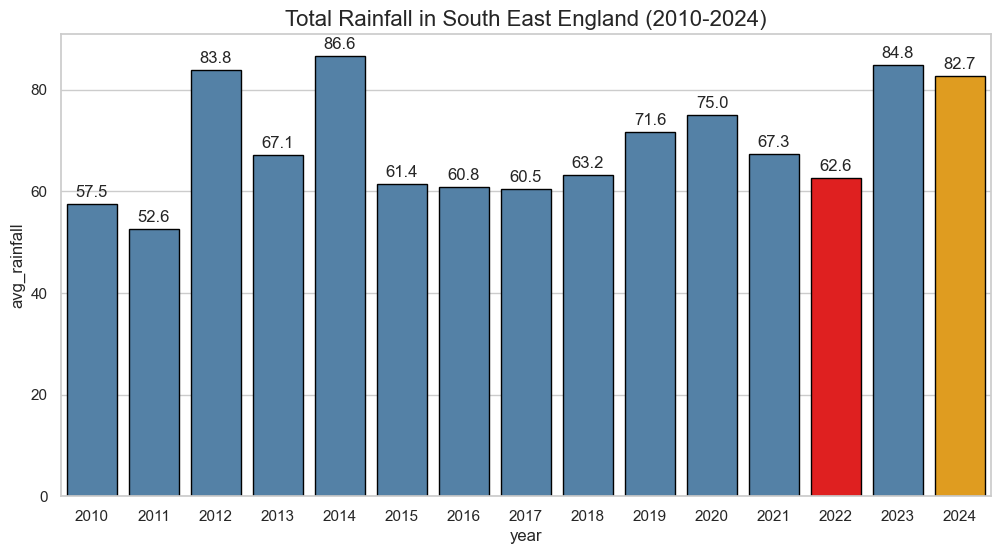

In [3]:
# Calculate the mean total rainfall for the years 2010-2023
# Note: The year 2024 is not included in the mean calculation as we want to compare it with the previous years.
# rainfall_mean = rainfall_se_2010_2024[rainfall_se_2010_2024['year'] < 2024]['total_rainfall'].mean()
rainfall_mean = rainfall_se[(rainfall_se['year'] >= 2010) & (rainfall_se['year']<=2024)]['total_rainfall'].mean()


print("Total Rainfall mean (2010-2023) = {}".format(np.round(rainfall_mean, 2)))

years = sorted(rainfall_se[(rainfall_se['year'] >= 2010) & (rainfall_se['year']<=2024)]['year'].unique())
colors = ['steelblue'] * len(years)

# Set special colors
last_year = max(years)
for i, year in enumerate(years):
    if year == 2022:
        colors[i] = 'red'      # Color for 2022
    elif year == last_year:
        colors[i] = 'orange'   # Color for last year


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=rainfall_se[(rainfall_se['year'] >= 2010) & (rainfall_se['year']<=2024)],
    x='year',
    y='avg_rainfall',
    hue='year',
    palette=colors,
    edgecolor='black',
    legend=False
    );

# Showing bars values
for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3)
# plt.axhline(y=rainfall_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {rainfall_mean:.2f}');

plt.title('Total Rainfall in South East England (2010-2024)', fontsize=16);

Starting from this plot, we can make it more general and plot the different features, i.e. total rainfall, mean, median, standard deviation, per year. 

> The plotted mean is refers to all years before the latest one. 

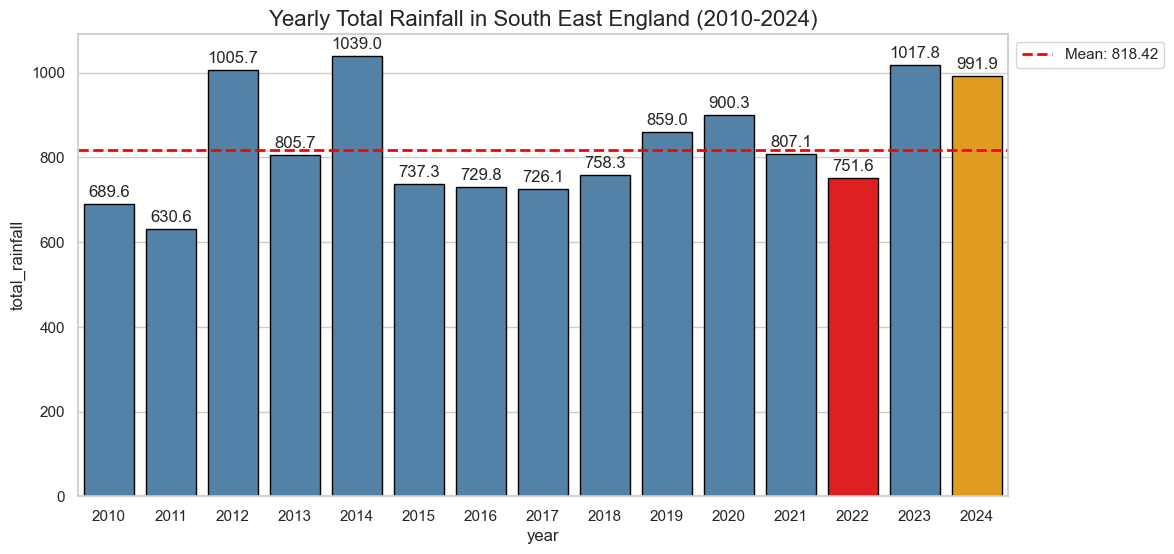

In [4]:
from src.data_plotting import plot_rainfall

start_year = 2010
latest_yaer = 2024

plot_rainfall(rainfall_se, start_year, latest_yaer, feature='total_rainfall', special_year=2022, title_label='Yearly Total Rainfall', year_shift = False)

So, if we are having a look to the first 5 months of 2025, the monthly mean looks actually significantly (I am not saying *is* statistically significantly) lower than the previous year. But one could argue that we are just comparing the first 5 months of the year, it could just be that for the first 5 months of the year, each year, the mean might be lower than the rest of the year. The next step is to compare the first 5 months of each year and see what the mean can tell us. 

In [5]:
months_compare = ['jan', 'feb', 'mar', 'apr', 'may']
rainfall_se_jan_to_may = (rainfall_data_se[rainfall_data_se['month'].isin(months_compare)]
                          .groupby('year')
                          .agg(
                              total_rainfall=('rainfall', 'sum'),
                              avg_rainfall=('rainfall', 'mean'),
                              median_rainfall=('rainfall', 'median'),
                              max_rainfall=('rainfall', 'max'),
                              min_rainfall=('rainfall', 'min')
                              )
                              ).reset_index()

rainfall_se_jan_to_may.head()

,year,total_rainfall,avg_rainfall,median_rainfall,max_rainfall,min_rainfall
0,1836,342.0,68.40,67.7,103.1,21.5
1,1837,240.4,48.08,34.4,81.1,19.8
2,1838,159.9,31.98,28.6,58.1,12.9
3,1839,216.2,43.24,48.6,53.5,25.2
4,1840,202.1,40.42,49.3,87.0,5.0


### Visualization for min max precipitation

In [6]:
rainfall_se

,year,total_rainfall,avg_rainfall,std_rainfall,median_rainfall,max_rainfall,min_rainfall
0,1836,892.4,74.4,29.4,66.4,126.1,21.5
1,1837,622.3,51.9,22.7,48.0,87.5,19.8
2,1838,679.9,56.7,32.3,51.0,122.8,12.9
3,1839,876.0,73.0,35.4,59.5,137.5,25.2
4,1840,601.9,50.2,34.7,49.6,121.6,5.0
...,...,...,...,...,...,...,...
185,2021,807.1,67.3,38.2,67.3,137.2,10.0
186,2022,751.6,62.6,50.9,46.7,189.3,5.6
187,2023,1017.8,84.8,45.6,84.2,160.8,7.2
188,2024,991.9,82.7,39.9,77.8,157.4,18.3


In [7]:
rainfall_se.columns

Index(['year', 'total_rainfall', 'avg_rainfall', 'std_rainfall',
       'median_rainfall', 'max_rainfall', 'min_rainfall'],
      dtype='object')

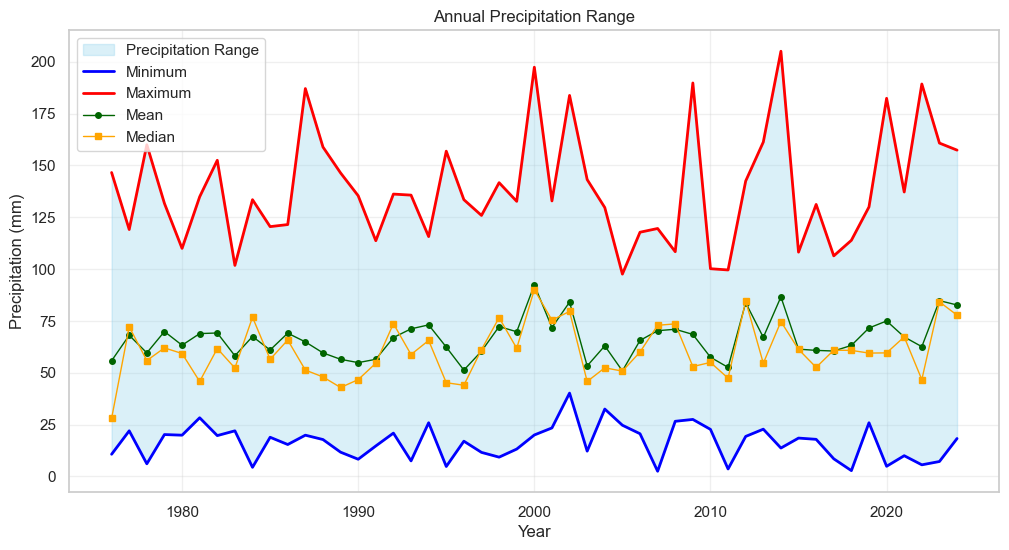

In [8]:
# Liine Plot with Fill Between

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

start_year = 1976
end_year = 2024

df_data = rainfall_se[(rainfall_se['year']>=start_year) &
                   (rainfall_se['year']<=end_year)]

# Fill the range between min and max
plt.figure(figsize=(12, 6))
plt.fill_between(df_data['year'], df_data['min_rainfall'], df_data['max_rainfall'], 
                 alpha=0.3, color='skyblue', label='Precipitation Range')

# Plot the boundary lines
plt.plot(df_data['year'], df_data['min_rainfall'], color='blue', linewidth=2, label='Minimum')
plt.plot(df_data['year'], df_data['max_rainfall'], color='red', linewidth=2, label='Maximum')

# Plot central tendencies with more prominent styling
plt.plot(df_data['year'], df_data['avg_rainfall'], color='darkgreen', linewidth=1, 
         label='Mean', marker='o', markersize=4)
plt.plot(df_data['year'], df_data['median_rainfall'], color='orange', linewidth=1, 
         label='Median', marker='s', markersize=4)


plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Annual Precipitation Range')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

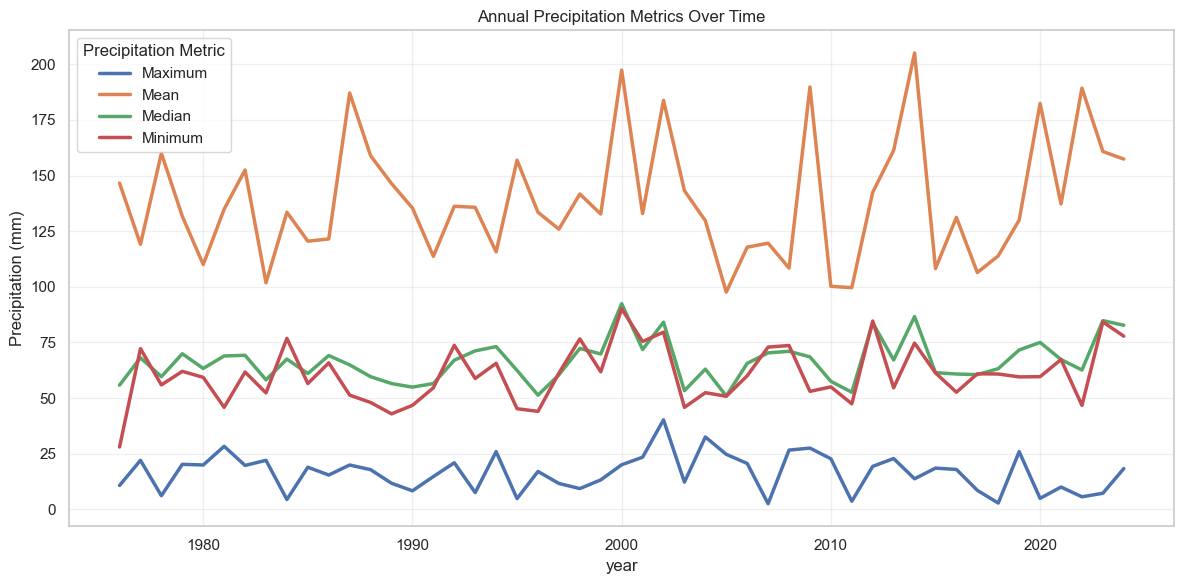

In [9]:
# Seaborn Line Plot (Clean Aternative)

# Reshape data for seaborn
# df_melted = df_data.melt(id_vars=['year'], 
#                     value_vars=['min_rainfall', 'max_rainfall'],
#                     var_name='type', value_name='precipitation')

df_melted = df_data.melt(id_vars=['year'],
                         value_vars=['min_rainfall', 'max_rainfall', 'avg_rainfall', 'median_rainfall'],
                         var_name='metric', 
                         value_name='precipitation')


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, 
             x='year', 
             y='precipitation', 
             hue='metric', 
             linewidth=2.5)

# Customize the legend labels for clarity
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Maximum', 'Mean', 'Median', 'Minimum']  # Adjust order as needed
plt.legend(handles, new_labels, title='Precipitation Metric')

plt.title('Annual Precipitation Metrics Over Time')
plt.ylabel('Precipitation (mm)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\pacor\AppData\Local\Temp\ipykernel_21588\2525219909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['error'] = df_data['max_rainfall'] - df_data['avg_rainfall']


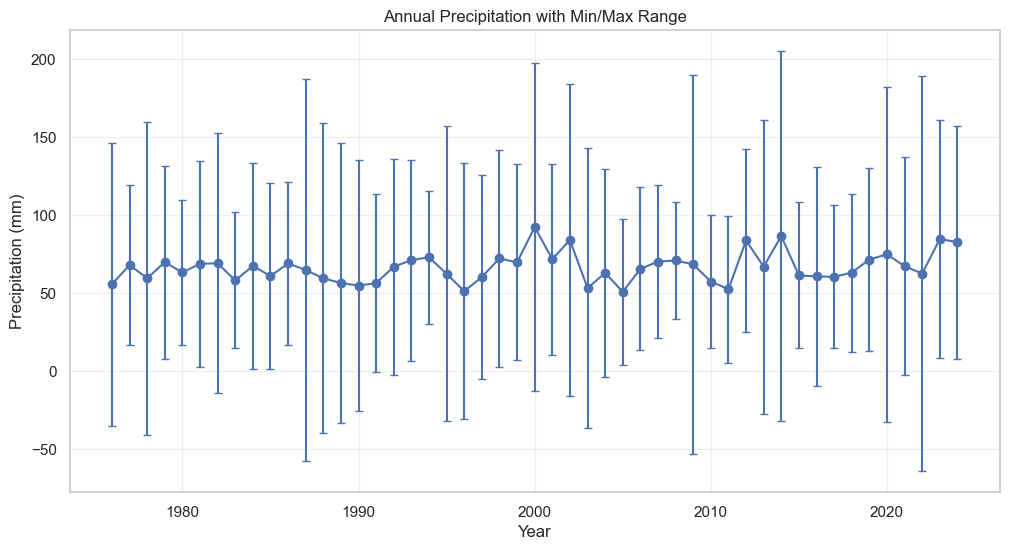

In [10]:
# Error Bar Plot

df_data['error'] = df_data['max_rainfall'] - df_data['avg_rainfall']

plt.figure(figsize=(12, 6))
plt.errorbar(df_data['year'], df_data['avg_rainfall'], yerr=df_data['error'], 
             fmt='o-', capsize=3, capthick=1, linewidth=1.5)
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Annual Precipitation with Min/Max Range')
plt.grid(True, alpha=0.3)
plt.show()

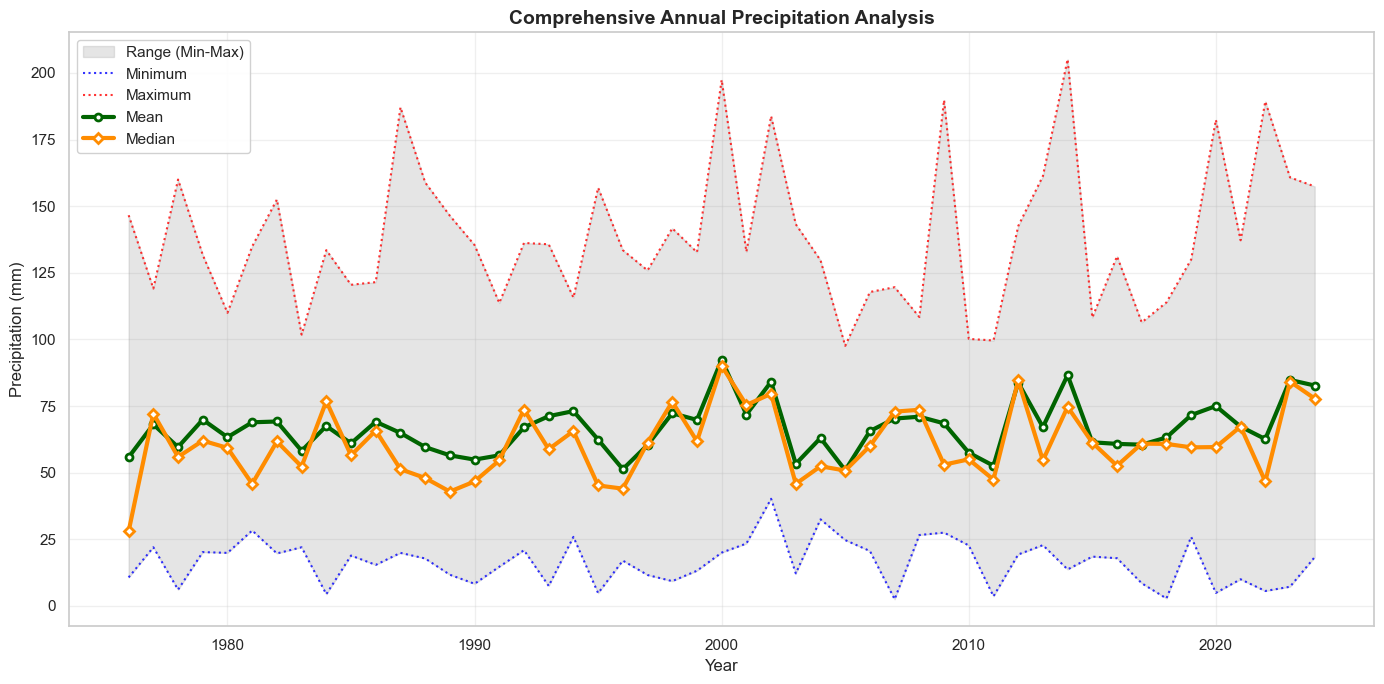

In [11]:
plt.figure(figsize=(14, 7))

# Fill between min/max
plt.fill_between(df_data['year'], df_data['min_rainfall'], df_data['max_rainfall'], 
                 alpha=0.2, color='gray', label='Range (Min-Max)')

# Plot extremes with thinner lines
plt.plot(df_data['year'], df_data['min_rainfall'], color='blue', linewidth=1.5, 
         linestyle=':', alpha=0.8, label='Minimum')
plt.plot(df_data['year'], df_data['max_rainfall'], color='red', linewidth=1.5, 
         linestyle=':', alpha=0.8, label='Maximum')

# Emphasize central tendencies
plt.plot(df_data['year'], df_data['avg_rainfall'], color='darkgreen', linewidth=3, 
         label='Mean', marker='o', markersize=5, markerfacecolor='white', 
         markeredgecolor='darkgreen', markeredgewidth=2)
plt.plot(df_data['year'], df_data['median_rainfall'], color='darkorange', linewidth=3, 
         label='Median', marker='D', markersize=5, markerfacecolor='white', 
         markeredgecolor='darkorange', markeredgewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
plt.title('Comprehensive Annual Precipitation Analysis', fontsize=14, fontweight='bold')
plt.legend(loc='best', framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

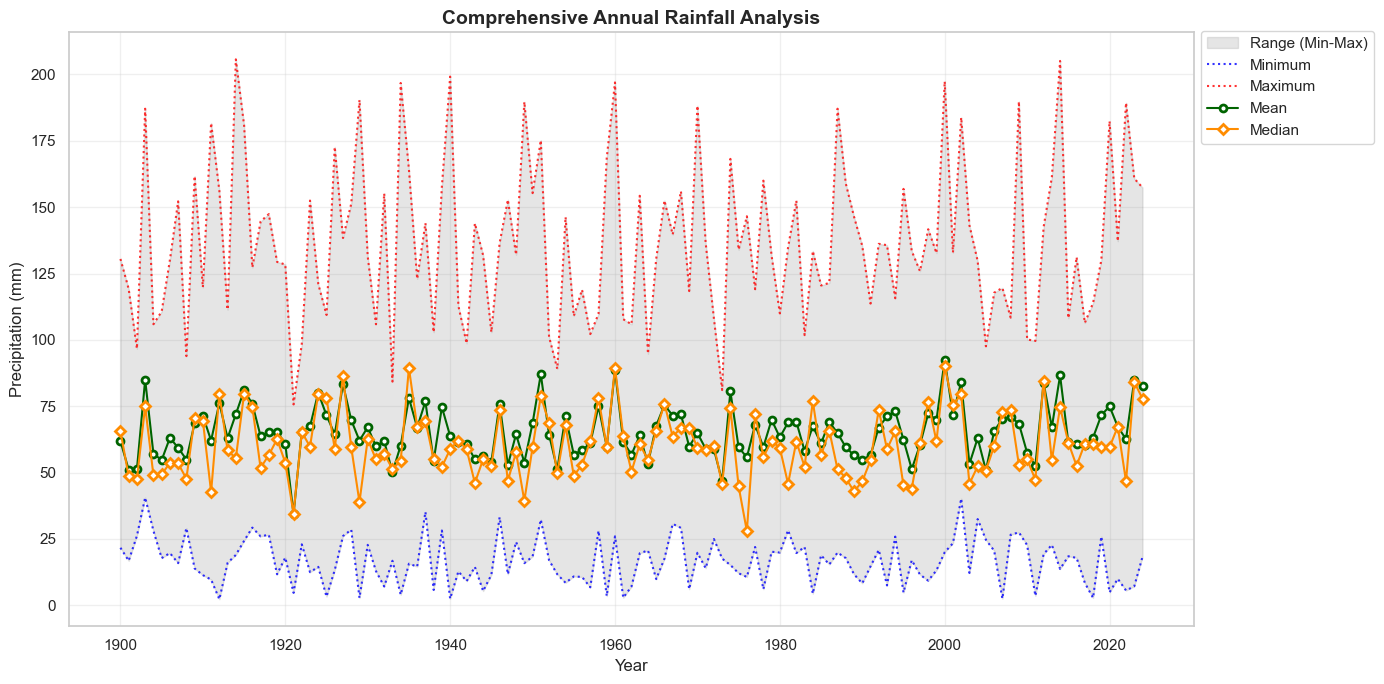

In [12]:
start_year = 1900
end_year = 2024

df_data = rainfall_se[(rainfall_se['year']>=start_year) &
                   (rainfall_se['year']<=end_year)]

plt.figure(figsize=(14, 7))

# Fill between min/max
plt.fill_between(df_data['year'], df_data['min_rainfall'], df_data['max_rainfall'], 
                 alpha=0.2, color='gray', label='Range (Min-Max)')

# Plot extremes with thinner lines
plt.plot(df_data['year'], df_data['min_rainfall'], color='blue', linewidth=1.5, 
         linestyle=':', alpha=0.8, label='Minimum')
plt.plot(df_data['year'], df_data['max_rainfall'], color='red', linewidth=1.5, 
         linestyle=':', alpha=0.8, label='Maximum')

# Emphasize central tendencies
plt.plot(df_data['year'], df_data['avg_rainfall'], color='darkgreen', linewidth=1.5, 
         label='Mean', marker='o', markersize=5, markerfacecolor='white', 
         markeredgecolor='darkgreen', markeredgewidth=2)
plt.plot(df_data['year'], df_data['median_rainfall'], color='darkorange', linewidth=1.5, 
         label='Median', marker='D', markersize=5, markerfacecolor='white', 
         markeredgecolor='darkorange', markeredgewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
plt.title('Comprehensive Annual Rainfall Analysis', fontsize=14, fontweight='bold')

# Right side of the plot (most common)
plt.legend(bbox_to_anchor=(1.0, 1.015), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This latest visualization looks clear enough. We can now turn it into function to be called in the main notebook.

In [13]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

def plot_min_max_rainfall(df_rainfall, 
                          start_year=None, 
                          end_year=None,
                          figsize=(12, 6)):
    
    df_data = df_rainfall[(df_rainfall['year']>=start_year) &
                          (df_rainfall['year']<=end_year)]

    print('test')
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=figsize)
    
    plt.figure(figsize=(14, 7))

    # Fill between min/max
    ax.fill_between(df_data['year'], df_data['min_rainfall'], df_data['max_rainfall'], 
                    alpha=0.2, color='gray', label='Range (Min-Max)')

    # Plot extremes with thinner lines
    ax.plot(df_data['year'], df_data['min_rainfall'], color='blue', linewidth=1.5, 
            linestyle=':', alpha=0.8, label='Minimum')
    ax.plot(df_data['year'], df_data['max_rainfall'], color='red', linewidth=1.5, 
            linestyle=':', alpha=0.8, label='Maximum')

    # Emphasize central tendencies
    ax.plot(df_data['year'], df_data['avg_rainfall'], color='darkgreen', linewidth=1.5, 
            label='Mean', marker='o', markersize=5, markerfacecolor='white', 
            markeredgecolor='darkgreen', markeredgewidth=2)
    ax.plot(df_data['year'], df_data['median_rainfall'], color='darkorange', linewidth=1.5, 
            label='Median', marker='D', markersize=5, markerfacecolor='white', 
            markeredgecolor='darkorange', markeredgewidth=2)

    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Precipitation (mm)', fontsize=12)

    # Create title with year range info
    year_range = f"{df_data['year'].min()}-{df_data['year'].max()}"
    ax.set_title(f'Annual Precipitation Analysis ({year_range})', fontsize=14, fontweight='bold')

    # Right side of the plot (most common)
    ax.legend(bbox_to_anchor=(1.0, 1.015), loc='upper left')
    print('test')
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    return fig, ax
    

test
test


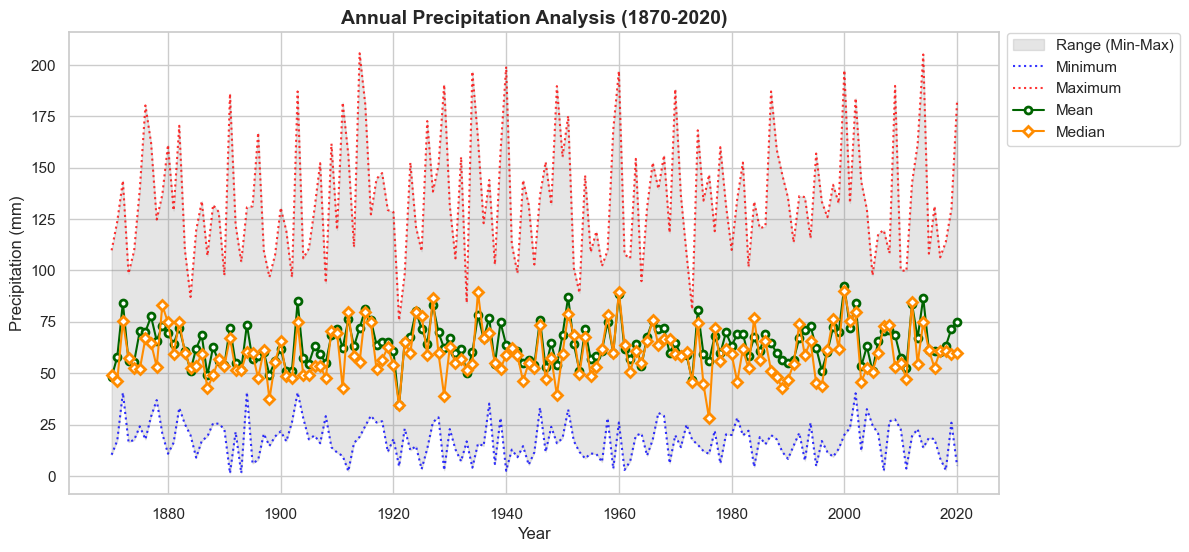

<Figure size 1400x700 with 0 Axes>

In [14]:
# Plot full range
fig1, ax1 = plot_min_max_rainfall(rainfall_se,start_year=1870, end_year=2020)
plt.show();

The above plot visualize the min and max values and the mean and median values, but it can be difficult to spot if actually the difference between min and max values are icreasing during the years. If we can visually identify a trend, then we can drill down with more accurate measures if that trend is consistent or not. 

Another useful insight can come from the difference between min and max value, to see if the gap is increasing or not. By looking and the above plot, I can spot that the minimum seems decreasing the in the log run, not sure about the max. Let's see if the annual monthly difference.

In [15]:
rainfall_se['max_min_diff'] = rainfall_se['max_rainfall'] - rainfall_se['min_rainfall']

In [16]:
rainfall_se.head()

,year,total_rainfall,avg_rainfall,std_rainfall,median_rainfall,max_rainfall,min_rainfall,max_min_diff
0,1836,892.4,74.4,29.4,66.4,126.1,21.5,104.6
1,1837,622.3,51.9,22.7,48.0,87.5,19.8,67.7
2,1838,679.9,56.7,32.3,51.0,122.8,12.9,109.9
3,1839,876.0,73.0,35.4,59.5,137.5,25.2,112.3
4,1840,601.9,50.2,34.7,49.6,121.6,5.0,116.6


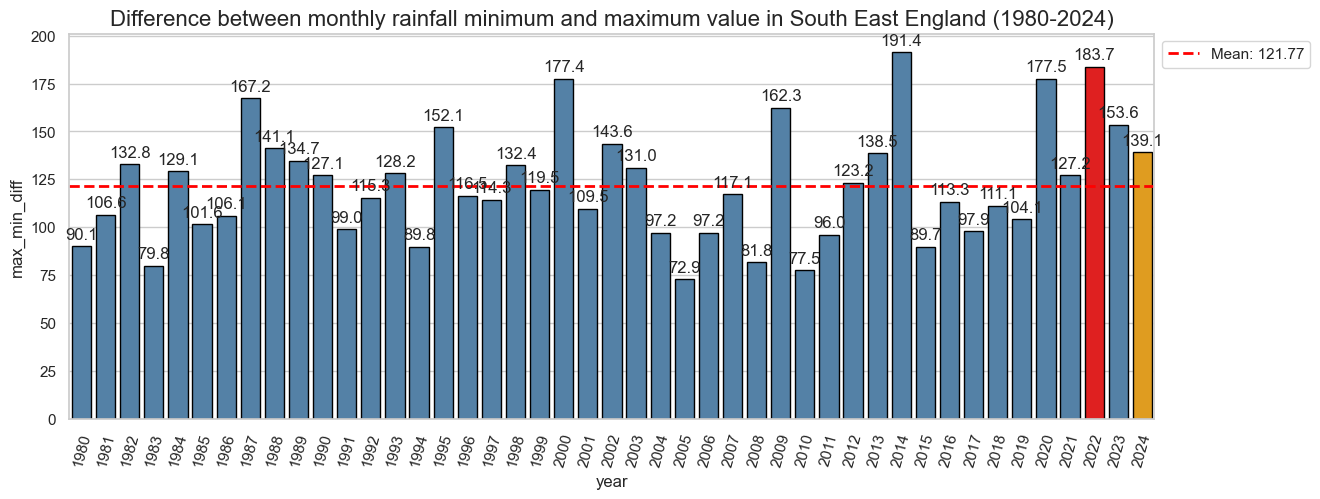

In [26]:
plot_rainfall(rainfall_se, 1980, 2024, 'max_min_diff', 2022, 'Difference between monthly rainfall minimum and maximum value',rotation_x_label=75, fig_size=(14,5))

In [18]:
rainfall_se_jan_to_may['max_min_diff'] = rainfall_se_jan_to_may['max_rainfall'] - rainfall_se_jan_to_may['min_rainfall']
rainfall_se_jan_to_may.head()

,year,total_rainfall,avg_rainfall,median_rainfall,max_rainfall,min_rainfall,max_min_diff
0,1836,342.0,68.40,67.7,103.1,21.5,81.6
1,1837,240.4,48.08,34.4,81.1,19.8,61.3
2,1838,159.9,31.98,28.6,58.1,12.9,45.2
3,1839,216.2,43.24,48.6,53.5,25.2,28.3
4,1840,202.1,40.42,49.3,87.0,5.0,82.0


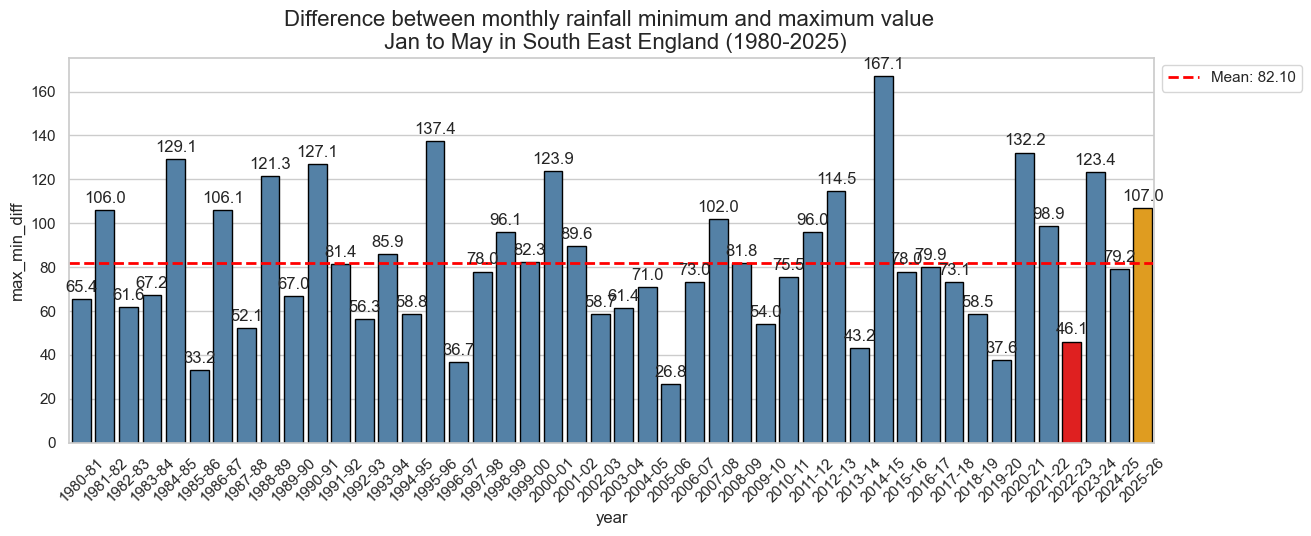

In [27]:
plot_rainfall(rainfall_se_jan_to_may, 1980, 2025, 'max_min_diff', 2022, 'Difference between monthly rainfall minimum and maximum value \n Jan to May', year_shift=True, fig_size=(14,5))

In [20]:
def plot_precipitation_analysis(df, start_year=None, end_year=None, 
                              year_col='year', min_col='min_precip', 
                              max_col='max_precip', mean_col='mean_precip', 
                              median_col='median_precip', figsize=(12, 6)):
    """
    Create a comprehensive precipitation analysis plot showing min, max, mean, and median values.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing precipitation data
    start_year : int, optional
        Starting year for the plot (if None, uses min year in data)
    end_year : int, optional
        Ending year for the plot (if None, uses max year in data)
    year_col : str, default 'year'
        Name of the column containing years
    min_col : str, default 'min_precip'
        Name of the column containing minimum precipitation values
    max_col : str, default 'max_precip'
        Name of the column containing maximum precipitation values
    mean_col : str, default 'mean_precip'
        Name of the column containing mean precipitation values
    median_col : str, default 'median_precip'
        Name of the column containing median precipitation values
    figsize : tuple, default (12, 6)
        Figure size as (width, height)
    
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object
    matplotlib.axes.Axes
        The axes object
    """
    
    # Filter data by year range if specified
    df_filtered = df.copy()
    if start_year is not None:
        df_filtered = df_filtered[df_filtered[year_col] >= start_year]
    if end_year is not None:
        df_filtered = df_filtered[df_filtered[year_col] <= end_year]
    
    # Check if filtered dataframe is empty
    if df_filtered.empty:
        raise ValueError("No data available for the specified year range")
    
    # Sort by year to ensure proper plotting
    df_filtered = df_filtered.sort_values(year_col)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Fill the range between min and max
    ax.fill_between(df_filtered[year_col], df_filtered[min_col], df_filtered[max_col], 
                    alpha=0.3, color='lightblue', label='Min-Max Range')
    
    # Plot the boundary lines
    ax.plot(df_filtered[year_col], df_filtered[min_col], color='blue', linewidth=2, 
            linestyle='--', label='Minimum')
    ax.plot(df_filtered[year_col], df_filtered[max_col], color='red', linewidth=2, 
            linestyle='--', label='Maximum')
    
    # Plot central tendencies with more prominent styling
    ax.plot(df_filtered[year_col], df_filtered[mean_col], color='darkgreen', linewidth=3, 
            label='Mean', marker='o', markersize=4)
    ax.plot(df_filtered[year_col], df_filtered[median_col], color='orange', linewidth=3, 
            label='Median', marker='s', markersize=4)
    
    # Customize the plot
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Precipitation (mm)', fontsize=12)
    
    # Create title with year range info
    year_range = f"{df_filtered[year_col].min()}-{df_filtered[year_col].max()}"
    ax.set_title(f'Annual Precipitation Analysis ({year_range})', fontsize=14, fontweight='bold')
    
    # Legend outside the plot
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    return fig, ax

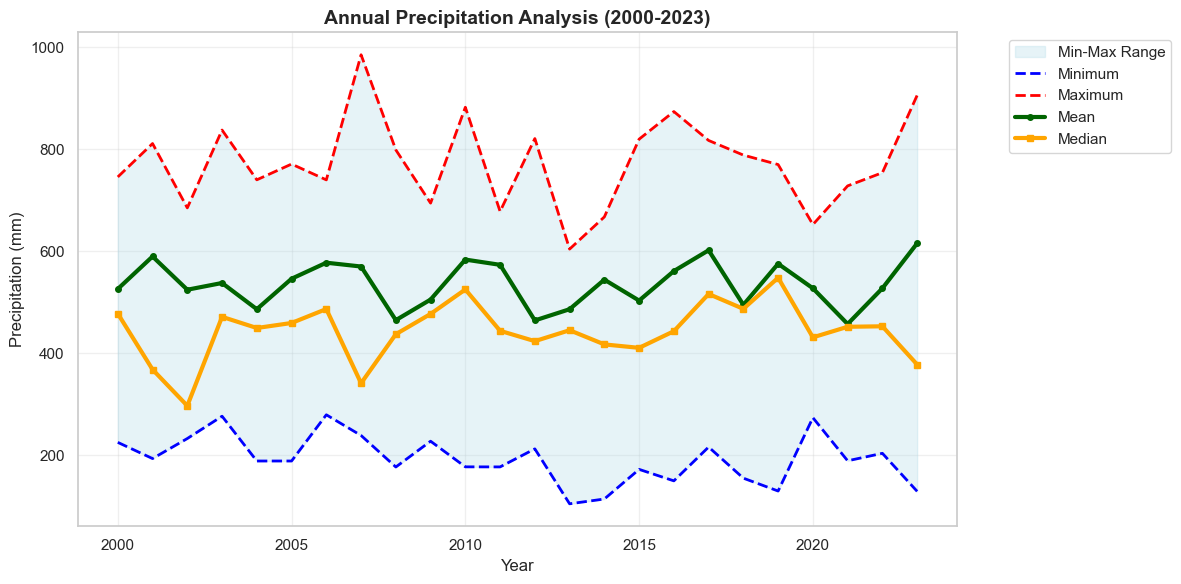

In [21]:
# Example usage:
if __name__ == "__main__":
    # Create sample data for demonstration
    import numpy as np
    
    years = list(range(2000, 2024))
    np.random.seed(42)  # For reproducible results
    
    sample_data = {
        'year': years,
        'min_precip': 200 + 50 * np.random.randn(len(years)),
        'max_precip': 800 + 100 * np.random.randn(len(years)),
        'mean_precip': 500 + 75 * np.random.randn(len(years)),
        'median_precip': 480 + 70 * np.random.randn(len(years))
    }
    
    # Ensure logical relationships (min < median < mean < max)
    for i in range(len(years)):
        values = [sample_data['min_precip'][i], sample_data['median_precip'][i], 
                 sample_data['mean_precip'][i], sample_data['max_precip'][i]]
        values.sort()
        sample_data['min_precip'][i] = values[0]
        sample_data['median_precip'][i] = values[1]
        sample_data['mean_precip'][i] = values[2]
        sample_data['max_precip'][i] = values[3]
    
    df_sample = pd.DataFrame(sample_data)
    
    # Plot full range
    fig1, ax1 = plot_precipitation_analysis(df_sample)
    plt.show()
    

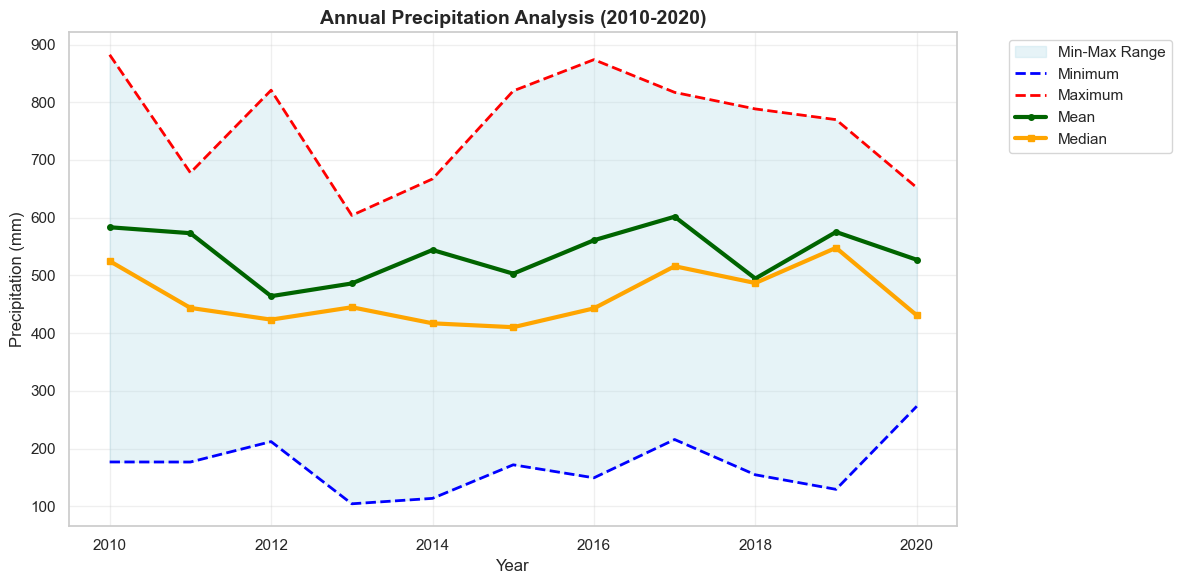

In [22]:
  # Plot specific year range
fig2, ax2 = plot_precipitation_analysis(df_sample, start_year=2010, end_year=2020)
plt.show()

In [23]:
def sort_and_highlight_dataframe(df, sort_column, columns_to_display, 
                                 highlight_condition=None, filter_condition=None,
                                 ascending=False, add_rank=True, 
                                 highlight_color='#2d5a87', n_rows=None):
    """
    Sort a dataframe and display selected columns with highlighted rows.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe to sort and display
    sort_column : str
        Column name to sort by
    columns_to_display : list
        List of column names to display in the final output
    highlight_condition : dict or list of dicts, optional
        Dictionary with column name as key and value(s) to highlight
        e.g., {'year': 2024} or {'year': [2024, 2023]}
        For multiple colors, use list of dicts:
        [{'condition': {'year': 2024}, 'color': '#ff0000'},
         {'condition': {'year': 2023}, 'color': '#00ff00'}]
    filter_condition : callable, optional
        Function that takes the dataframe and returns a boolean mask
        e.g., lambda df: (df['year'] >= 2010) & (df['year'] <= 2024)
    ascending : bool, default False
        Sort order (False for descending, True for ascending)
    add_rank : bool, default True
        Whether to add a 'Rank' column based on sort order
    highlight_color : str or dict, default '#2d5a87'
        Background color for highlighted rows. Can be:
        - Single color string (applied to all highlights)
        - Ignored if highlight_condition contains color specifications
    n_rows : int, optional
        Number of top rows to display (None for all rows)
    
    Returns:
    --------
    pandas.io.formats.style.Styler
        Styled dataframe with highlighted rows
    """
    import pandas as pd
    
    # Apply filter condition if provided
    if filter_condition is not None:
        filtered_df = df[filter_condition(df)].copy()
    else:
        filtered_df = df.copy()
    
    # Sort the dataframe
    sorted_df = filtered_df.sort_values(sort_column, ascending=ascending).reset_index(drop=True)
    
    # Find indices to highlight
    highlight_mapping = {}  # index -> color mapping
    
    if highlight_condition is not None:
        # Handle both old format (dict) and new format (list of dicts)
        if isinstance(highlight_condition, dict):
            # Old format - single condition, single color
            if 'condition' in highlight_condition and 'color' in highlight_condition:
                # New format but single item
                conditions = [highlight_condition]
            else:
                # Old format
                conditions = [{'condition': highlight_condition, 'color': highlight_color}]
        elif isinstance(highlight_condition, list):
            # New format - multiple conditions with colors
            conditions = highlight_condition
        else:
            conditions = []
        
        for cond_spec in conditions:
            condition = cond_spec['condition']
            color = cond_spec.get('color', highlight_color)
            
            for col, values in condition.items():
                if not isinstance(values, list):
                    values = [values]
                for value in values:
                    indices = sorted_df[sorted_df[col] == value].index.tolist()
                    for idx in indices:
                        highlight_mapping[idx] = color
    
    # Limit rows if specified
    if n_rows is not None:
        sorted_df = sorted_df.head(n_rows)
        # Filter highlight_mapping to only include visible rows
        highlight_mapping = {k: v for k, v in highlight_mapping.items() if k < n_rows}
    
    # Remove duplicates and sort (not needed anymore since we use highlight_mapping)
    # highlight_indices = sorted(list(set(highlight_indices)))
    
    # Define highlighting function with multiple colors
    def highlight_rows(s):
        if s.name in highlight_mapping:
            return [f'background-color: {highlight_mapping[s.name]}' for _ in s]
        else:
            return ['' for _ in s]
    
    # Apply styling and return
    styled_df = sorted_df[columns_to_display].style.hide(axis='index').apply(highlight_rows, axis=1)
    
    return styled_df

# Example usage function that replicates your original code
def rainfall_analysis_example(rainfall_se):
    """
    Example function showing how to use sort_and_highlight_dataframe 
    with your rainfall data.
    """
    return sort_and_highlight_dataframe(
        df=rainfall_se,
        sort_column='total_rainfall',
        columns_to_display=['year', 'total_rainfall', 'avg_rainfall', 'median_rainfall'],
        highlight_condition={'year': 2024},
        filter_condition=lambda df: (df['year'] >= 2010) & (df['year'] <= 2024),
        ascending=False,
        add_rank=True,
        highlight_color='#2d5a87'
    )


# Alternative simpler function for common use cases
def quick_sort_highlight(df, sort_by, show_cols, highlight_year=None, top_n=None):
    """
    Simplified version for quick sorting and highlighting by year.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    sort_by : str
        Column to sort by
    show_cols : list
        Columns to display
    highlight_year : int, optional
        Year to highlight
    top_n : int, optional
        Number of top rows to show
    """
    highlight_condition = {'year': highlight_year} if highlight_year else None
    
    return sort_and_highlight_dataframe(
        df=df,
        sort_column=sort_by,
        columns_to_display=show_cols,
        highlight_condition=highlight_condition,
        ascending=False,
        add_rank=True,
        n_rows=top_n
    )

In [24]:
def sort_and_highlight_dataframe(df, sort_column, columns_to_display, 
                                 highlight_condition=None, filter_condition=None,
                                 ascending=False, add_rank=True, 
                                 highlight_color='#2d5a87', n_rows=None):
    """
    Sort a dataframe and display selected columns with highlighted rows.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe to sort and display
    sort_column : str
        Column name to sort by
    columns_to_display : list
        List of column names to display in the final output
    highlight_condition : dict or list of dicts, optional
        Dictionary with column name as key and value(s) to highlight
        e.g., {'year': 2024} or {'year': [2024, 2023]}
        For multiple colors, use list of dicts:
        [{'condition': {'year': 2024}, 'color': '#ff0000'},
         {'condition': {'year': 2023}, 'color': '#00ff00'}]
    filter_condition : callable, optional
        Function that takes the dataframe and returns a boolean mask
        e.g., lambda df: (df['year'] >= 2010) & (df['year'] <= 2024)
    ascending : bool, default False
        Sort order (False for descending, True for ascending)
    add_rank : bool, default True
        Whether to add a 'Rank' column based on sort order
    highlight_color : str or dict, default '#2d5a87'
        Background color for highlighted rows. Can be:
        - Single color string (applied to all highlights)
        - Ignored if highlight_condition contains color specifications
    n_rows : int, optional
        Number of top rows to display (None for all rows)
    
    Returns:
    --------
    pandas.io.formats.style.Styler
        Styled dataframe with highlighted rows
    """
    import pandas as pd
    
    # Apply filter condition if provided
    if filter_condition is not None:
        filtered_df = df[filter_condition(df)].copy()
    else:
        filtered_df = df.copy()
    
    # Sort the dataframe
    sorted_df = filtered_df.sort_values(sort_column, ascending=ascending).reset_index(drop=True)
    
    # Find indices to highlight
    highlight_mapping = {}  # index -> color mapping
    
    if highlight_condition is not None:
        # Handle both old format (dict) and new format (list of dicts)
        if isinstance(highlight_condition, dict):
            # Old format - single condition, single color
            if 'condition' in highlight_condition and 'color' in highlight_condition:
                # New format but single item
                conditions = [highlight_condition]
            else:
                # Old format
                conditions = [{'condition': highlight_condition, 'color': highlight_color}]
        elif isinstance(highlight_condition, list):
            # New format - multiple conditions with colors
            conditions = highlight_condition
        else:
            conditions = []
        
        for cond_spec in conditions:
            condition = cond_spec['condition']
            color = cond_spec.get('color', highlight_color)
            
            for col, values in condition.items():
                if not isinstance(values, list):
                    values = [values]
                for value in values:
                    indices = sorted_df[sorted_df[col] == value].index.tolist()
                    for idx in indices:
                        highlight_mapping[idx] = color
    
    # Limit rows if specified
    if n_rows is not None:
        sorted_df = sorted_df.head(n_rows)
        # Filter highlight_mapping to only include visible rows
        highlight_mapping = {k: v for k, v in highlight_mapping.items() if k < n_rows}
    
    # Remove duplicates and sort (not needed anymore since we use highlight_mapping)
    # highlight_indices = sorted(list(set(highlight_indices)))
    
    # Define highlighting function with multiple colors
    def highlight_rows(s):
        if s.name in highlight_mapping:
            return [f'background-color: {highlight_mapping[s.name]}' for _ in s]
        else:
            return ['' for _ in s]
    
    # Apply styling and return
    styled_df = sorted_df[columns_to_display].style.hide(axis='index').apply(highlight_rows, axis=1)
    
    return styled_df


# Example usage with multiple colors
def rainfall_analysis_multicolor_example(rainfall_se):
    """
    Example showing multiple highlight colors.
    """
    return sort_and_highlight_dataframe(
        df=rainfall_se,
        sort_column='total_rainfall',
        columns_to_display=['year', 'total_rainfall', 'avg_rainfall', 'median_rainfall'],
        highlight_condition=[
            {'condition': {'year': 2024}, 'color': '#ff4444'},  # Red for 2024
            {'condition': {'year': 2023}, 'color': '#44ff44'},  # Green for 2023
            {'condition': {'year': 2022}, 'color': '#4444ff'}   # Blue for 2022
        ],
        filter_condition=lambda df: (df['year'] >= 2010) & (df['year'] <= 2024),
        ascending=False,
        add_rank=True
    )


# Alternative simpler function for common use cases
def quick_sort_highlight(df, sort_by, show_cols, highlight_year=None, top_n=None):
    """
    Simplified version for quick sorting and highlighting by year.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    sort_by : str
        Column to sort by
    show_cols : list
        Columns to display
    highlight_year : int, optional
        Year to highlight
    top_n : int, optional
        Number of top rows to show
    """
    highlight_condition = {'year': highlight_year} if highlight_year else None
    
    return sort_and_highlight_dataframe(
        df=df,
        sort_column=sort_by,
        columns_to_display=show_cols,
        highlight_condition=highlight_condition,
        ascending=False,
        add_rank=True,
        n_rows=top_n
    )

# Example usage with multiple colors
def rainfall_analysis_multicolor_example(rainfall_se):
    """
    Example showing multiple highlight colors.
    """
    return sort_and_highlight_dataframe(
        df=rainfall_se,
        sort_column='total_rainfall',
        columns_to_display=['year', 'total_rainfall', 'avg_rainfall', 'median_rainfall'],
        highlight_condition=[
            {'condition': {'year': 2024}, 'color': '#ff4444'},  # Red for 2024
            {'condition': {'year': 2023}, 'color': '#44ff44'},  # Green for 2023
            {'condition': {'year': 2022}, 'color': '#4444ff'}   # Blue for 2022
        ],
        filter_condition=lambda df: (df['year'] >= 2010) & (df['year'] <= 2024),
        ascending=False,
        add_rank=True
    )


# # Alternative simpler function for common use cases
def quick_sort_highlight(df, sort_by, show_cols, highlight_year=None, top_n=None):
    """
    Simplified version for quick sorting and highlighting by year.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    sort_by : str
        Column to sort by
    show_cols : list
        Columns to display
    highlight_year : int, optional
        Year to highlight
    top_n : int, optional
        Number of top rows to show
    """
    highlight_condition = {'year': highlight_year} if highlight_year else None
    
    return sort_and_highlight_dataframe(
        df=df,
        sort_column=sort_by,
        columns_to_display=show_cols,
        highlight_condition=highlight_condition,
        ascending=False,
        add_rank=True,
        n_rows=top_n
    )